In [1]:
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rock_vs_paper_vs_scissors.zip

--2021-04-14 00:40:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rock_vs_paper_vs_scissors.zip’

/tmp/rock_vs_paper_ 100%[===================>] 307.92M  8.66MB/s    in 58s     

2021-04-14 00:41:42 (5.30 MB/s) - ‘/tmp/rock_vs_paper_vs_scissors.zip’ saved [322873683/322873683]



In [11]:
import zipfile,os
local_zip = '/tmp/rock_vs_paper_vs_scissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/rockpaperscissors/rps-cv-images'



In [12]:
    os.listdir(base_dir)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,
                        horizontal_flip=True,
                        shear_range = 0.2,
                        fill_mode = 'nearest',
                        validation_split=0.4)

In [22]:
training_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    shuffle = True,
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [29]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.fit(
      training_generator,
      steps_per_epoch=21,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
      )

Epoch 1/20
21/21 - 14s - loss: 0.0742 - accuracy: 0.9688 - val_loss: 0.0978 - val_accuracy: 0.9609
Epoch 2/20
21/21 - 14s - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.0255 - val_accuracy: 0.9922
Epoch 3/20
21/21 - 14s - loss: 0.0476 - accuracy: 0.9836 - val_loss: 0.1022 - val_accuracy: 0.9844
Epoch 4/20
21/21 - 14s - loss: 0.0259 - accuracy: 0.9922 - val_loss: 0.0581 - val_accuracy: 0.9688
Epoch 5/20
21/21 - 14s - loss: 0.0584 - accuracy: 0.9821 - val_loss: 0.1475 - val_accuracy: 0.9688
Epoch 6/20
21/21 - 14s - loss: 0.0596 - accuracy: 0.9813 - val_loss: 0.0390 - val_accuracy: 0.9922
Epoch 7/20
21/21 - 14s - loss: 0.0576 - accuracy: 0.9821 - val_loss: 0.1692 - val_accuracy: 0.9766
Epoch 8/20
21/21 - 14s - loss: 0.0462 - accuracy: 0.9866 - val_loss: 0.0373 - val_accuracy: 0.9922
Epoch 9/20
21/21 - 14s - loss: 0.0265 - accuracy: 0.9911 - val_loss: 0.0753 - val_accuracy: 0.9844
Epoch 10/20
21/21 - 14s - loss: 0.0168 - accuracy: 0.9970 - val_loss: 0.0712 - val_accuracy: 0.9922
Epoch 11/

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png
0RA9rcrv8iVvuDDU.png
kertas


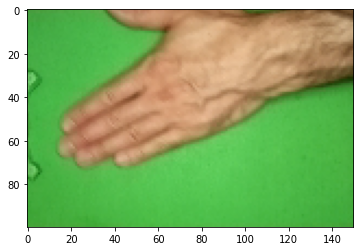

In [42]:
    import numpy as np
    from google.colab import files
    from keras.preprocessing import image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    %matplotlib inline
     
    uploaded = files.upload()
     
    for fn in uploaded.keys():
     
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(100,150))
      imgplot = plt.imshow(img)
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
     
      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      
      print(fn)
      if classes[0][0]==1:
        print('kertas')
      elif classes[0][1]==1:
        print('Batu')
      else:
        print('Gunting')